In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import numpy as np

In [2]:
prices = pd.read_csv('prices.csv')

In [3]:
prices['time'] = pd.to_datetime(prices['time'])
prices['time_rounded'] = prices['time'].apply(lambda dt: np.datetime64(datetime.datetime(dt.year, dt.month, dt.day, dt.hour), 's'))
prices = prices.dropna(axis='rows', subset=['price'])
prices = prices.drop_duplicates(['product', 'shop', 'time_rounded'])


In [4]:
prices.head()

,product,shop,price,time,time_rounded
0,Intel Core i7-7800X,czc,10022.0,2018-07-27 13:13:01.536418,2018-07-27 13:00:00
1,ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING,czc,22990.0,2018-07-27 13:13:01.950984,2018-07-27 13:00:00
2,ASUS PRIME X299-A - Intel X299,czc,7339.0,2018-07-27 13:13:02.254500,2018-07-27 13:00:00
3,ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000,czc,8999.0,2018-07-27 13:13:02.570936,2018-07-27 13:00:00
4,Be quiet! Dark Rock PRO 4,czc,1999.0,2018-07-27 13:13:03.854654,2018-07-27 13:00:00


In [5]:
prices.dtypes

product                 object
shop                    object
price                  float64
time            datetime64[ns]
time_rounded    datetime64[ns]
dtype: object

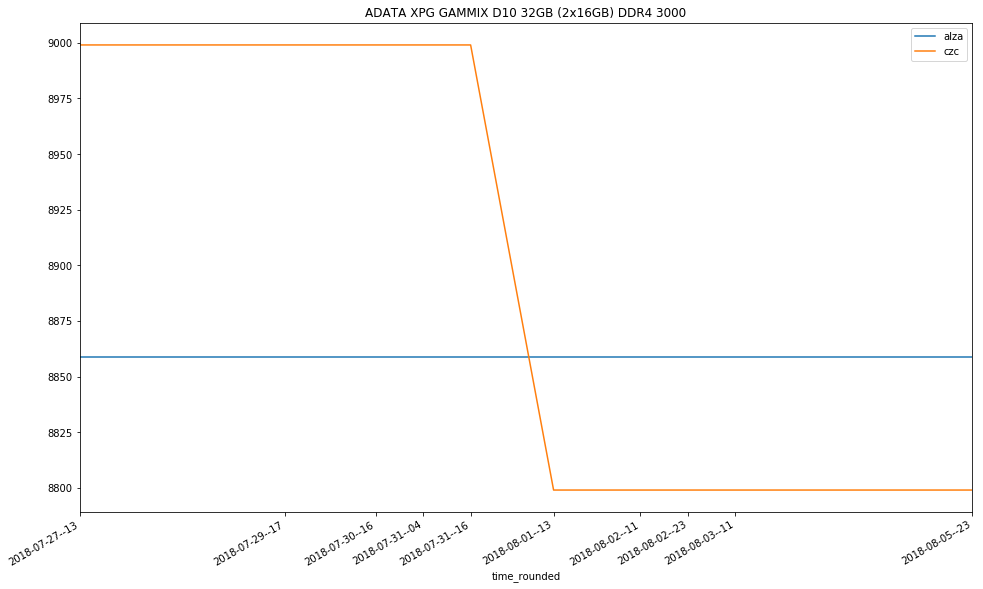

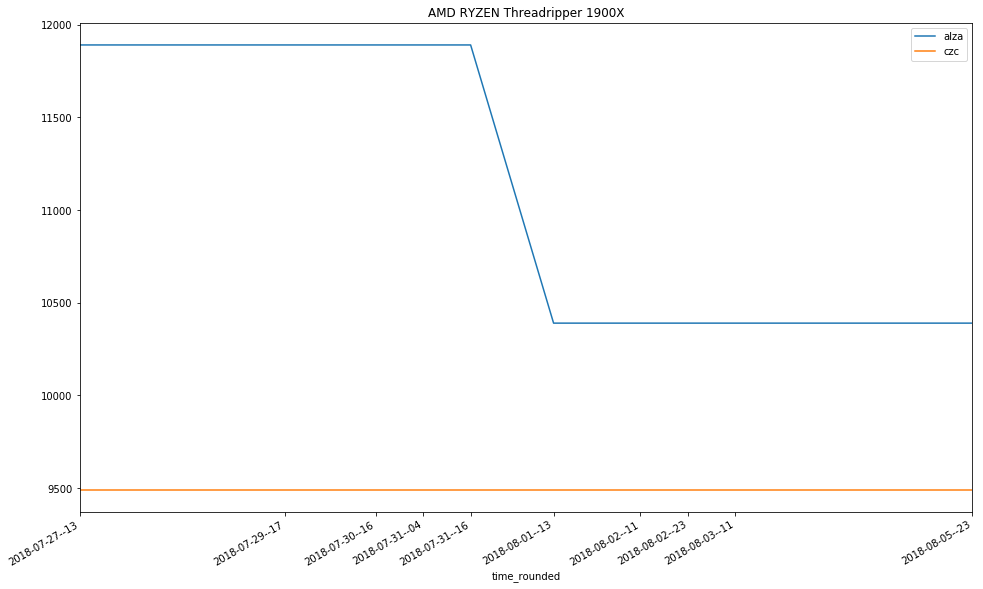

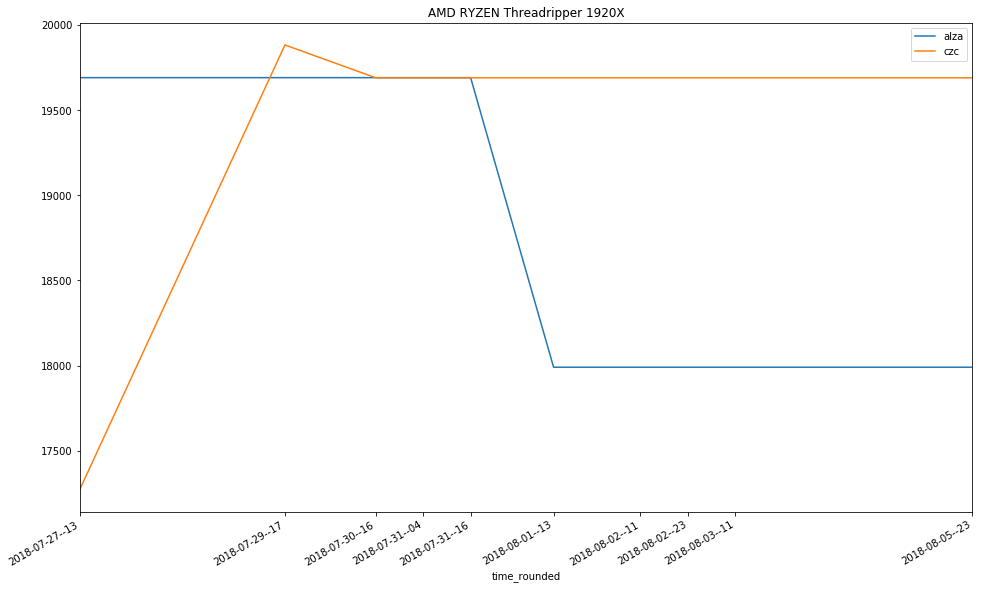

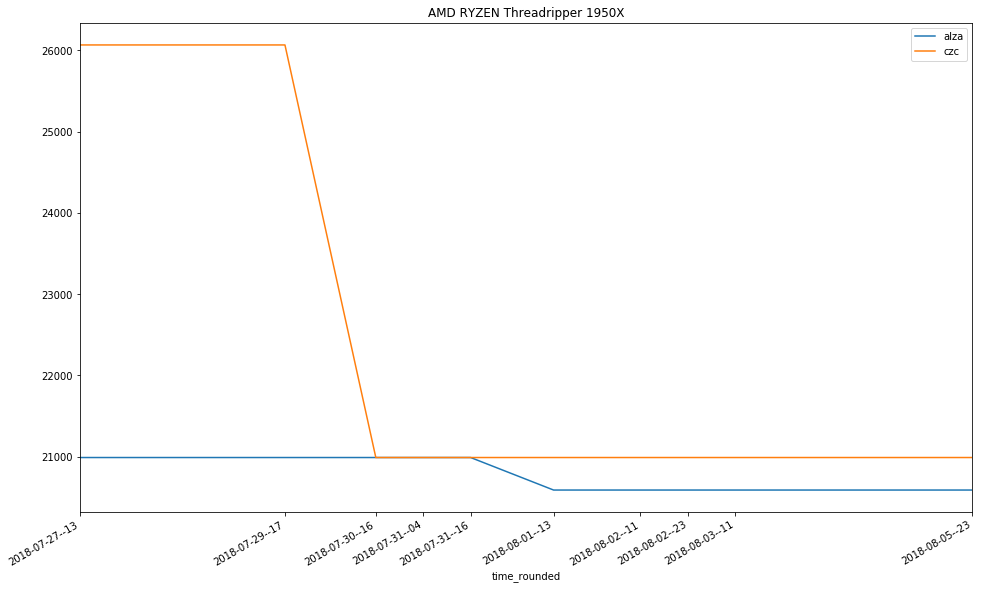

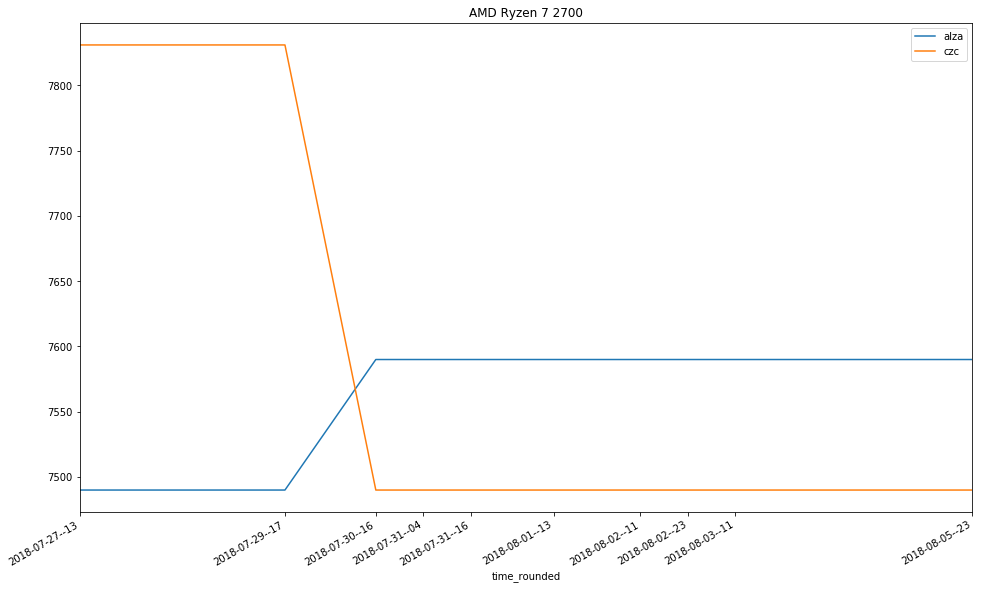

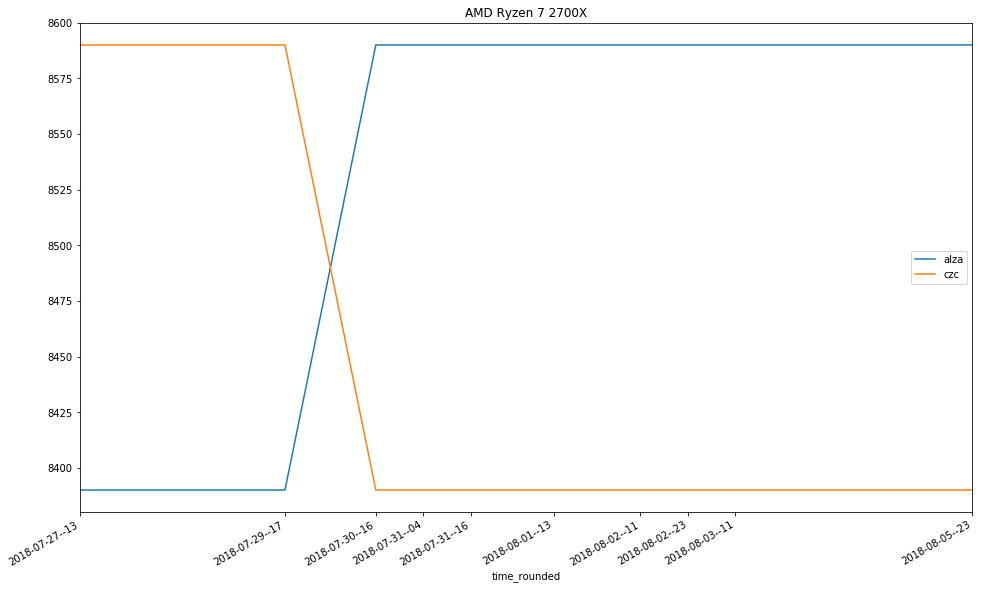

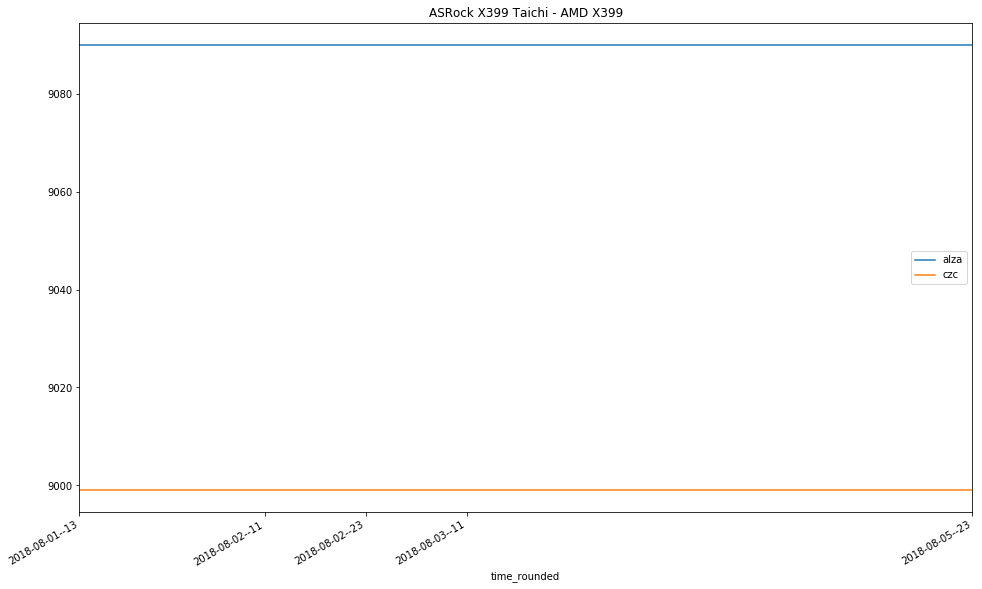

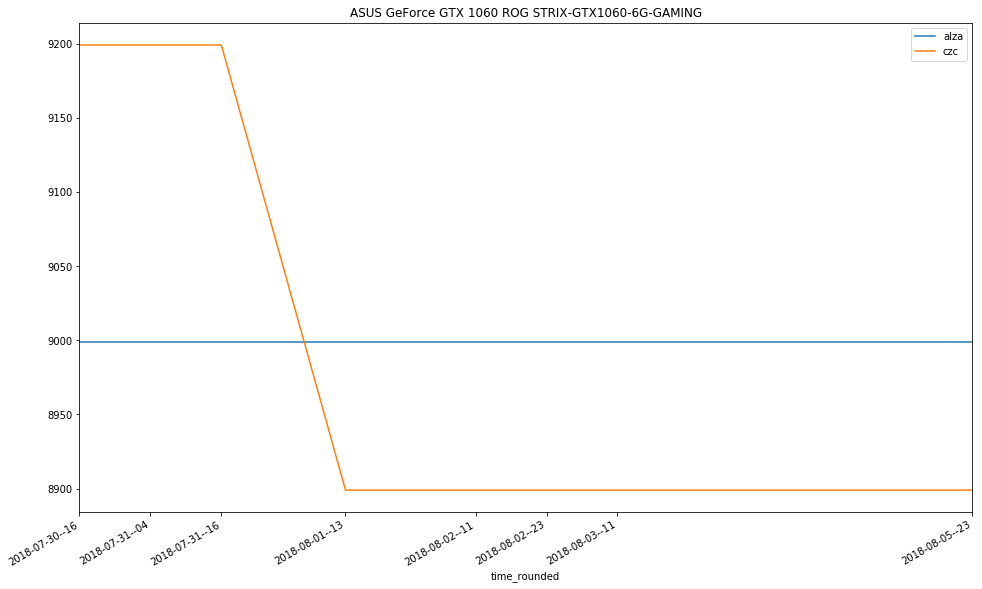

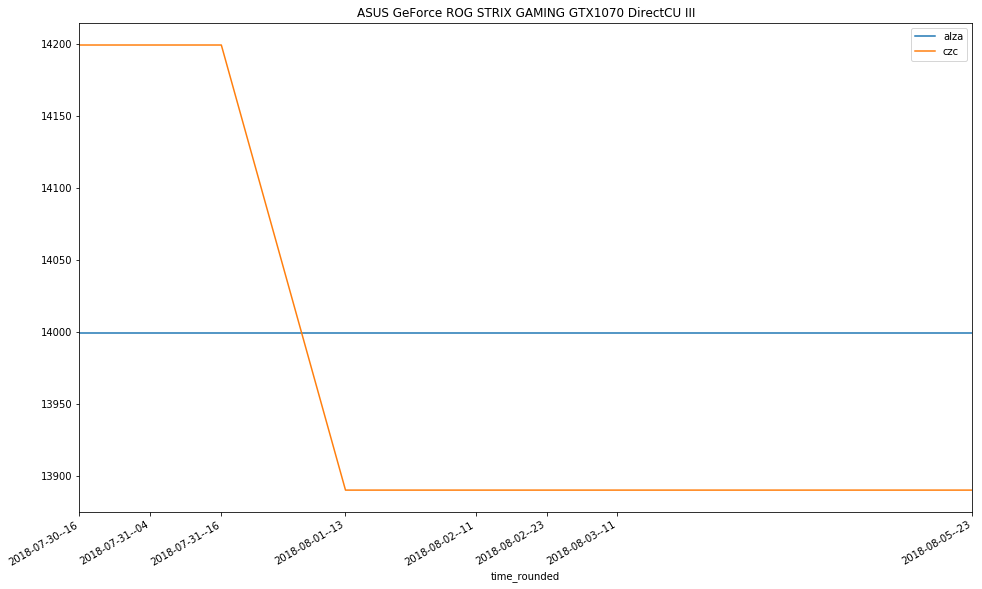

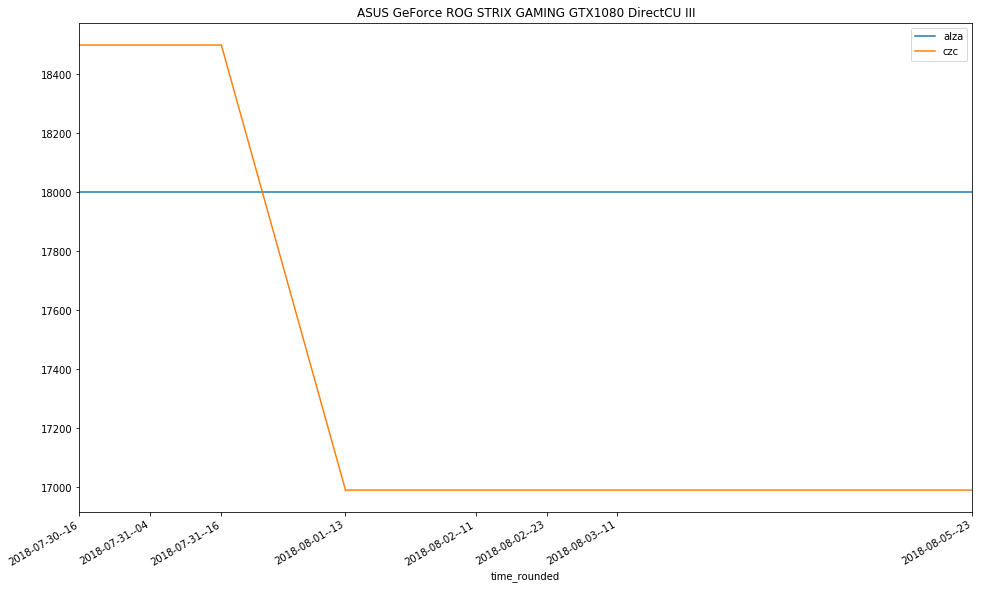

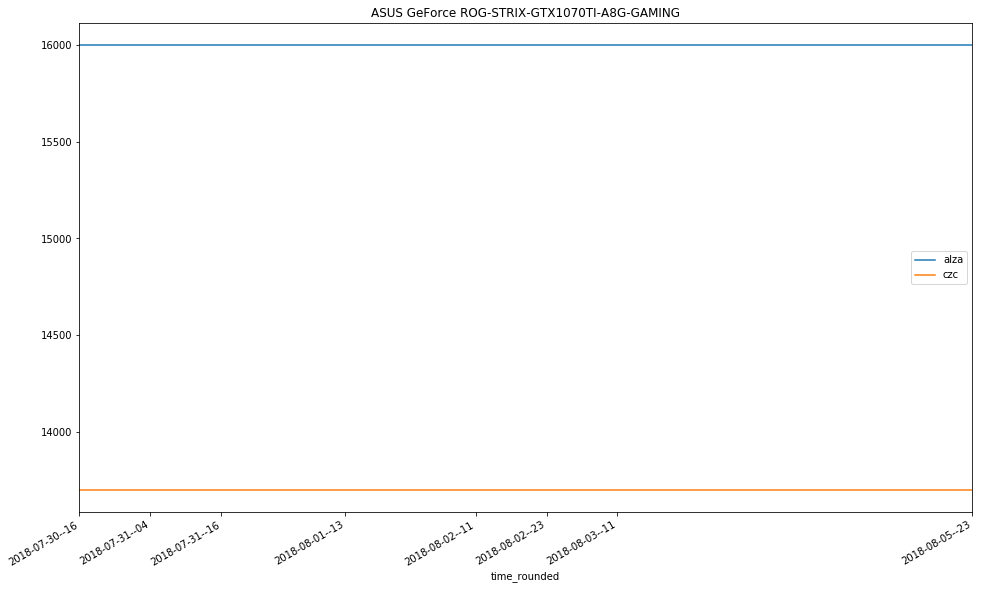

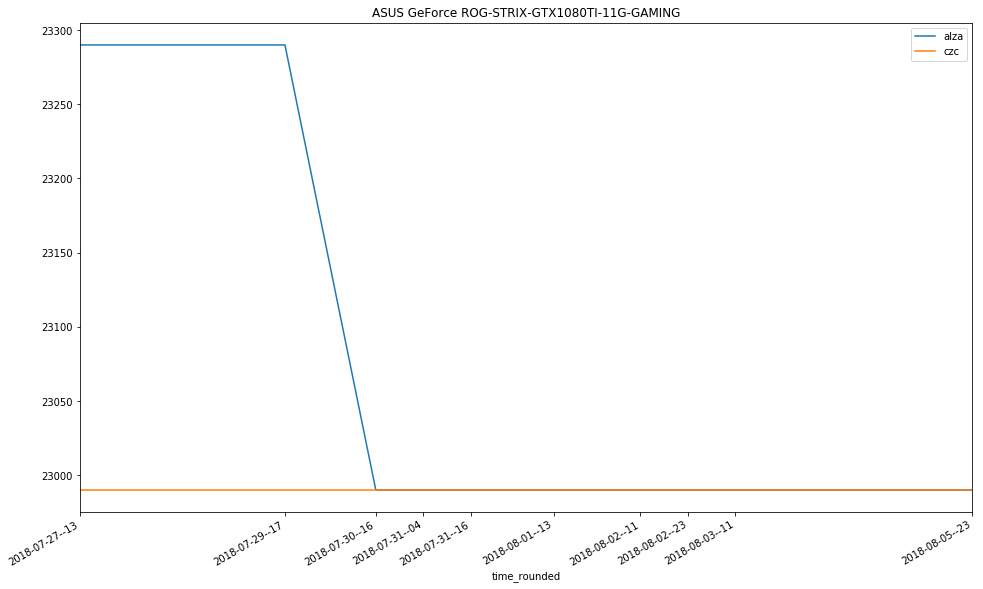

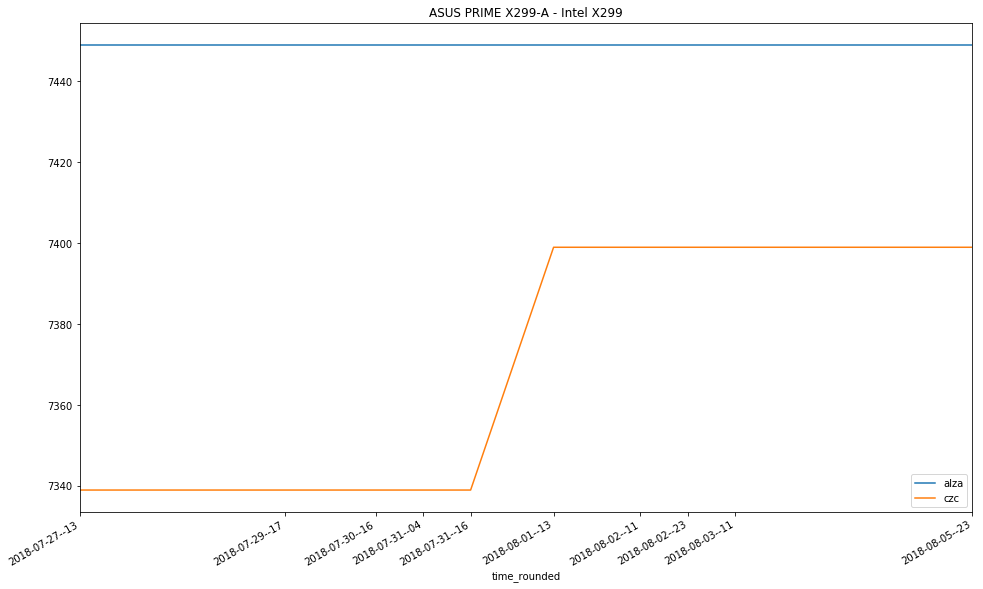

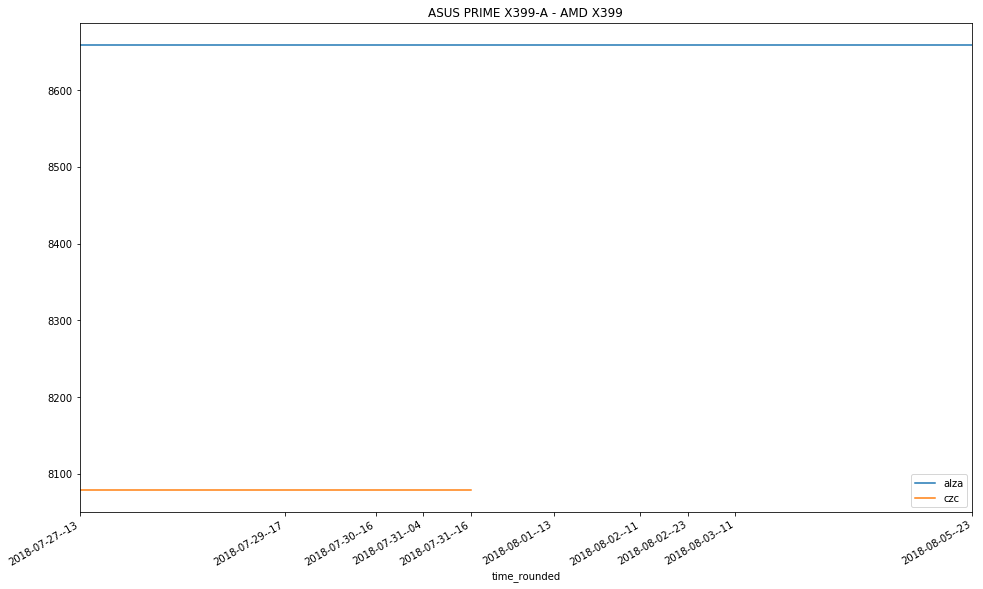

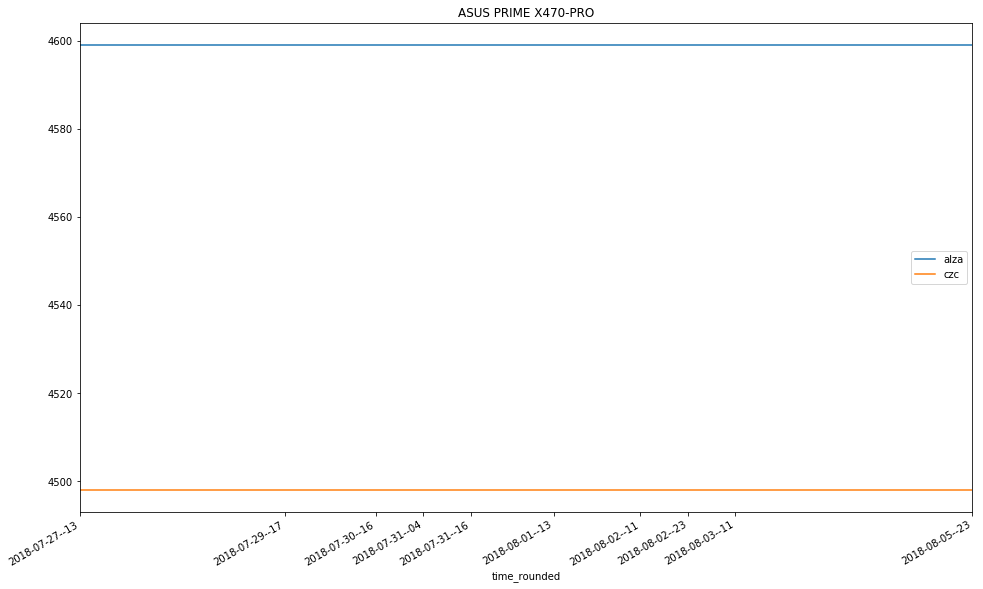

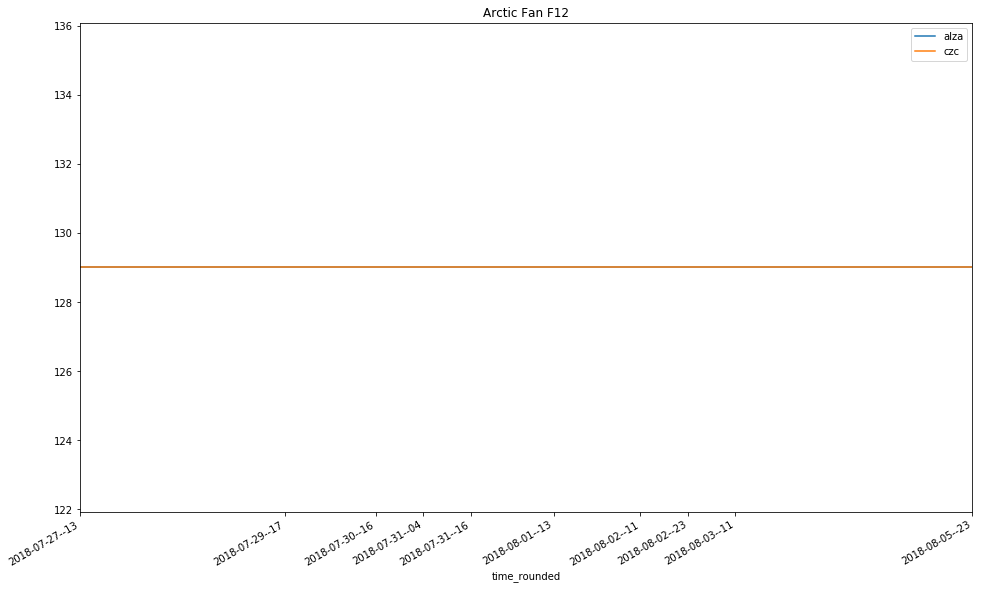

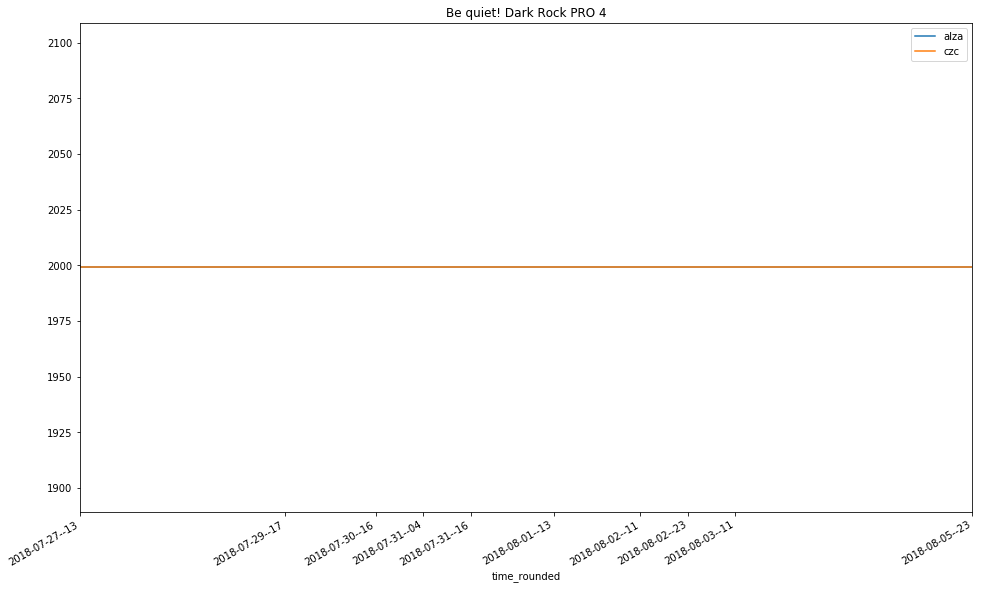

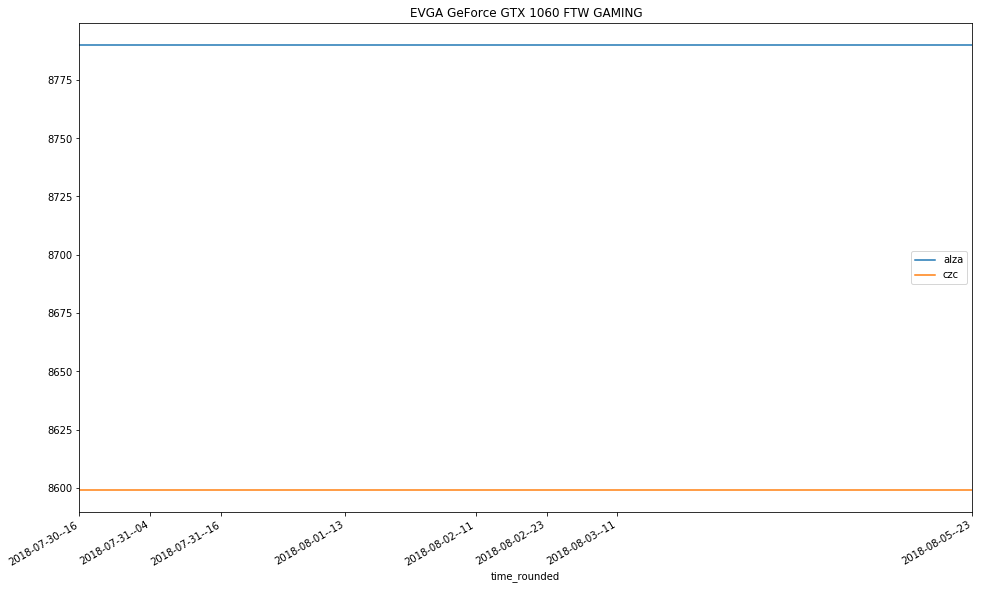

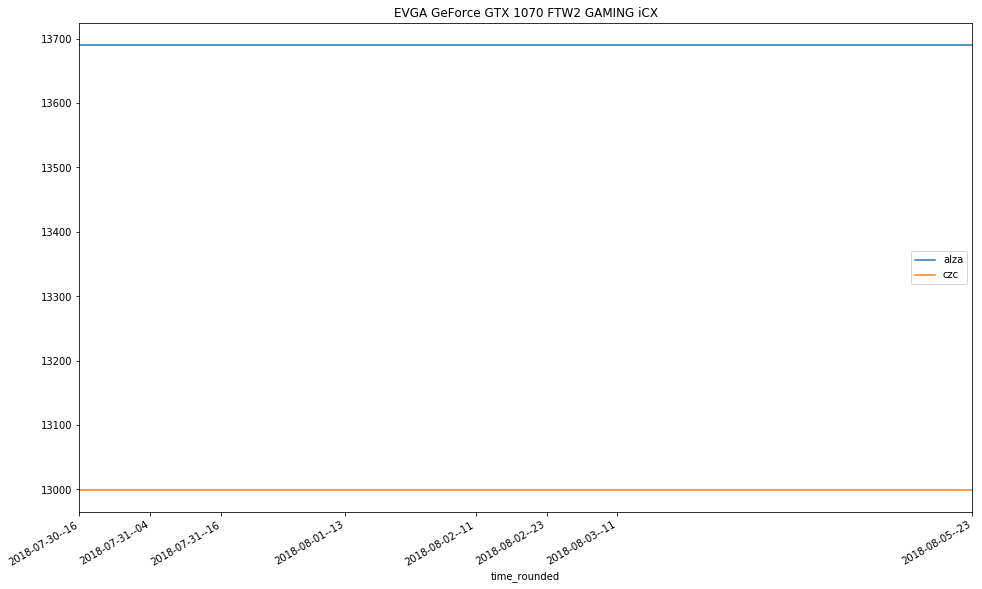

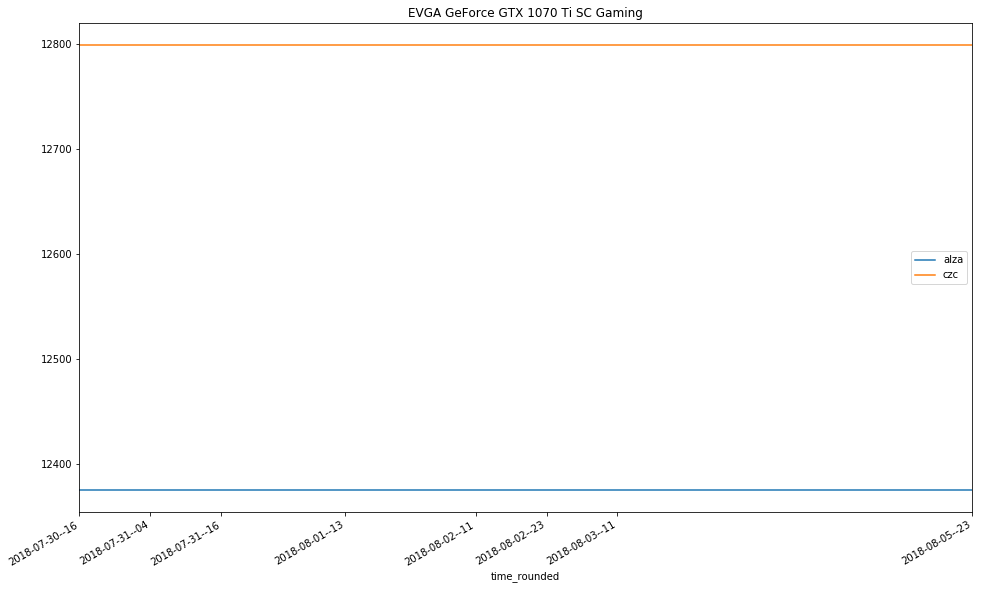

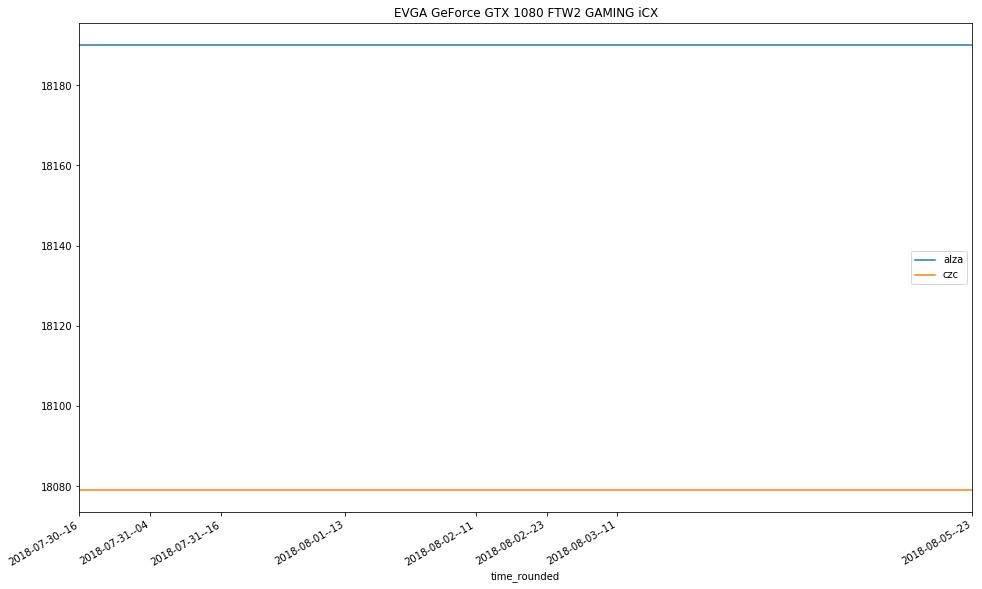

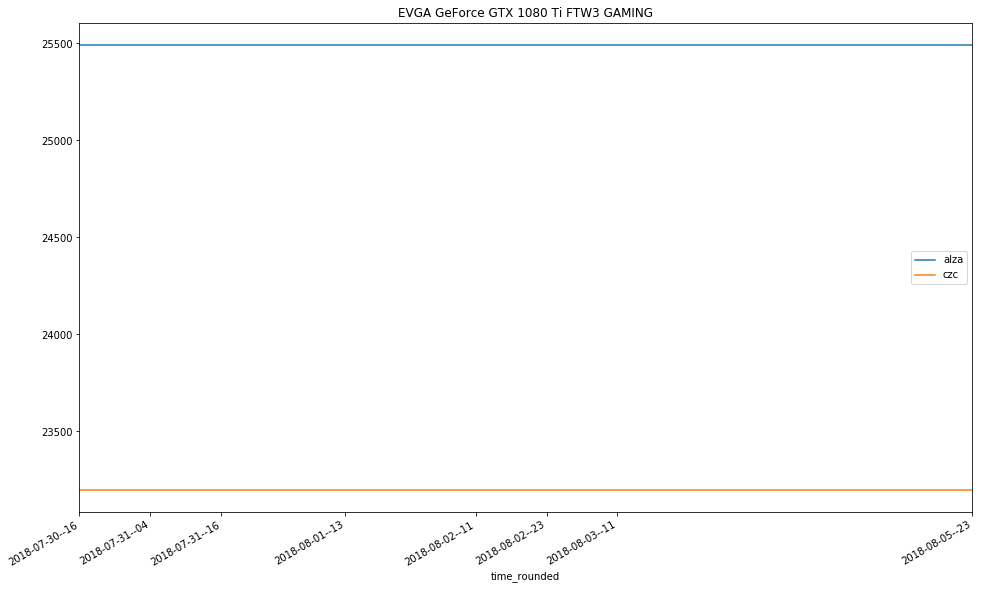

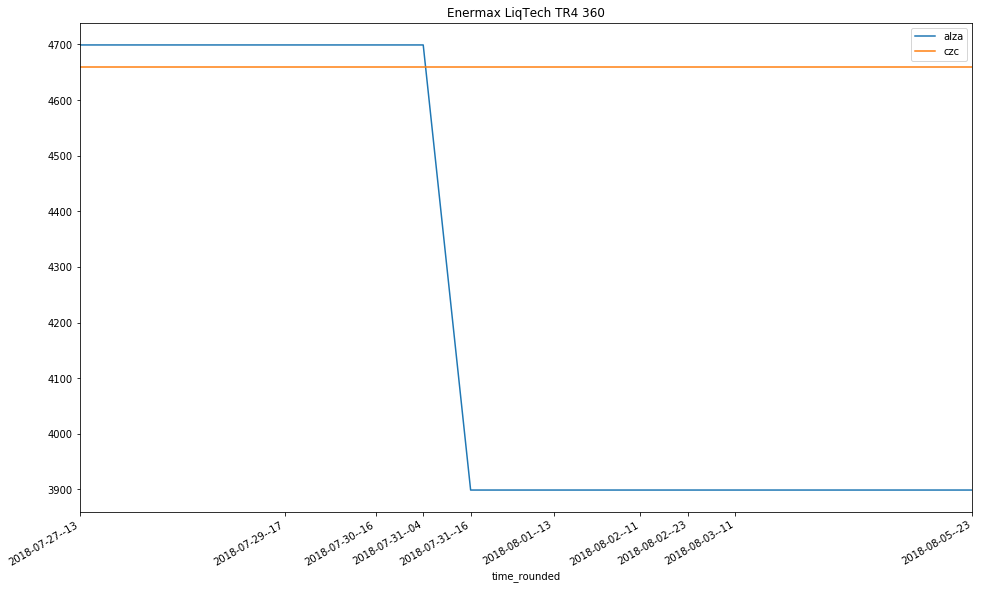

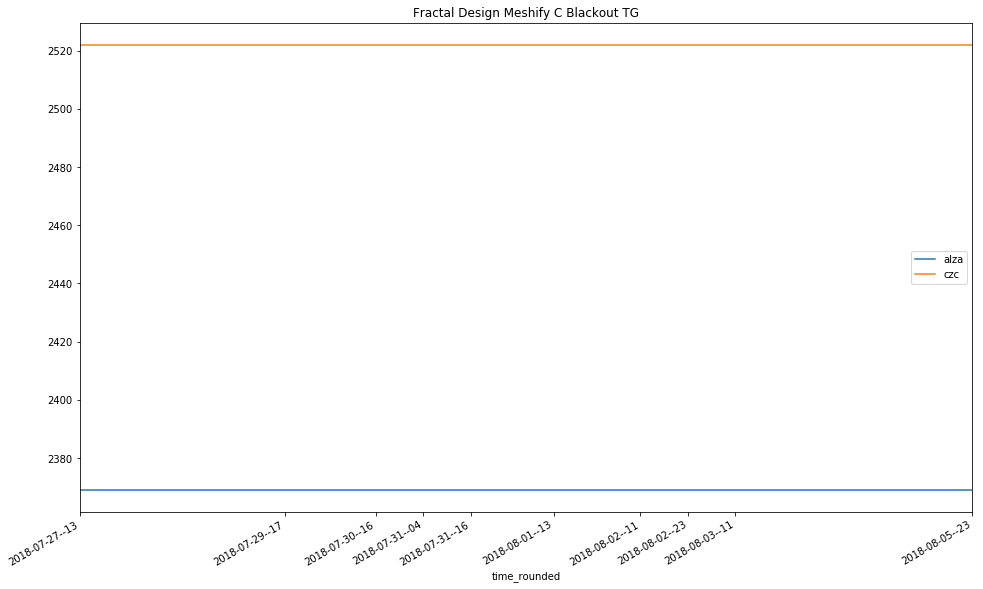

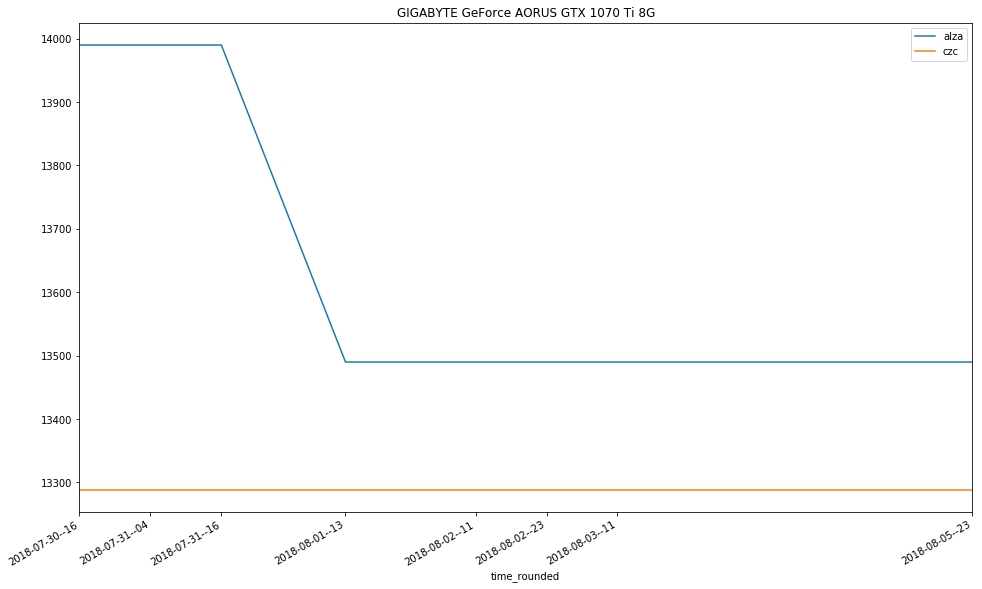

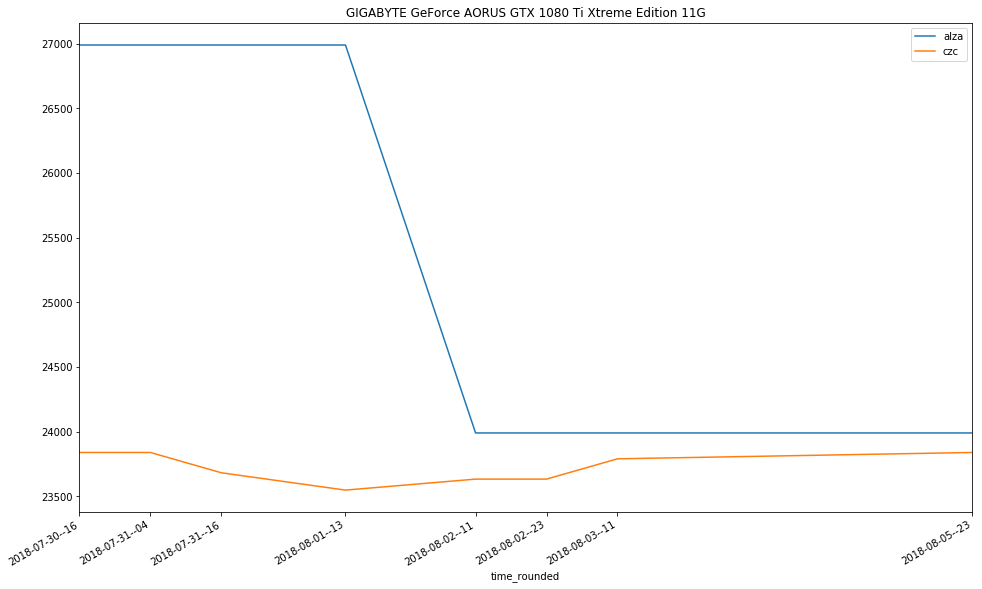

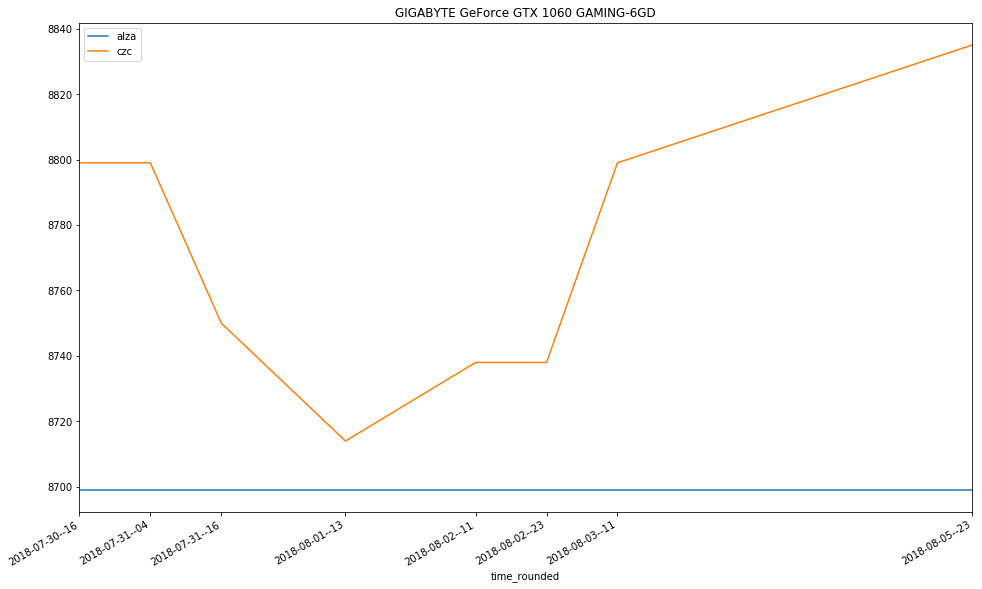

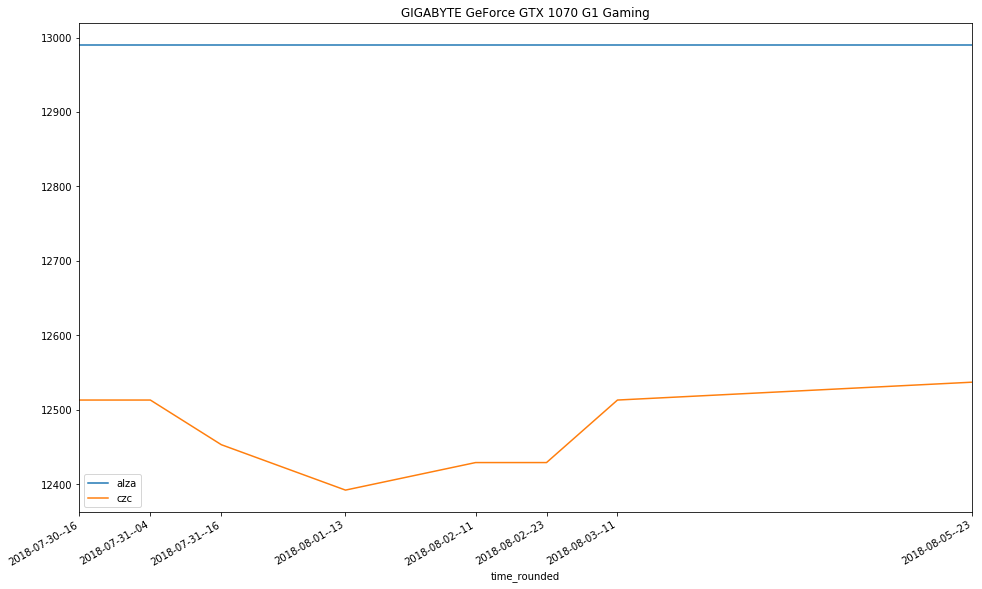

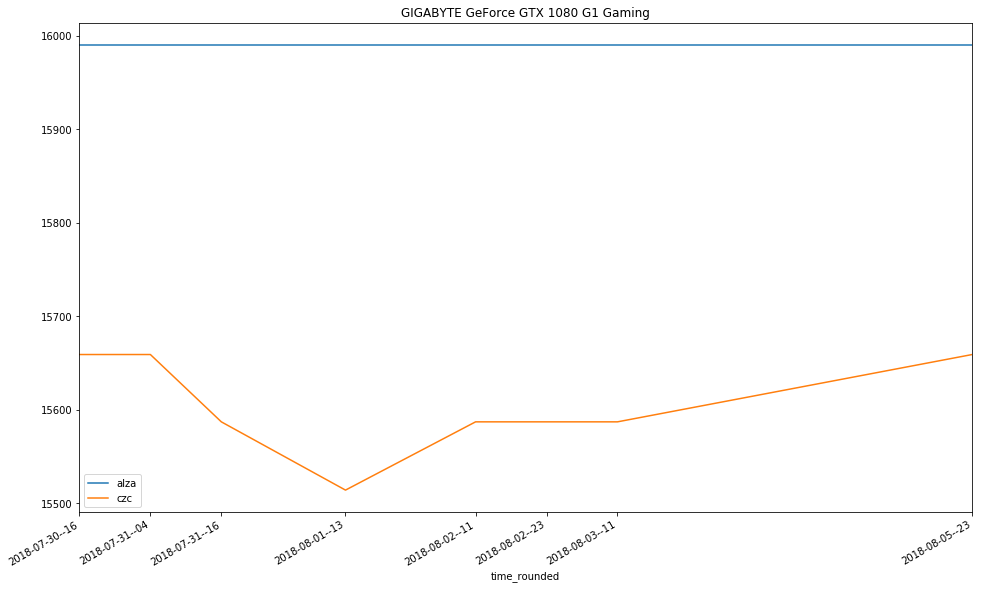

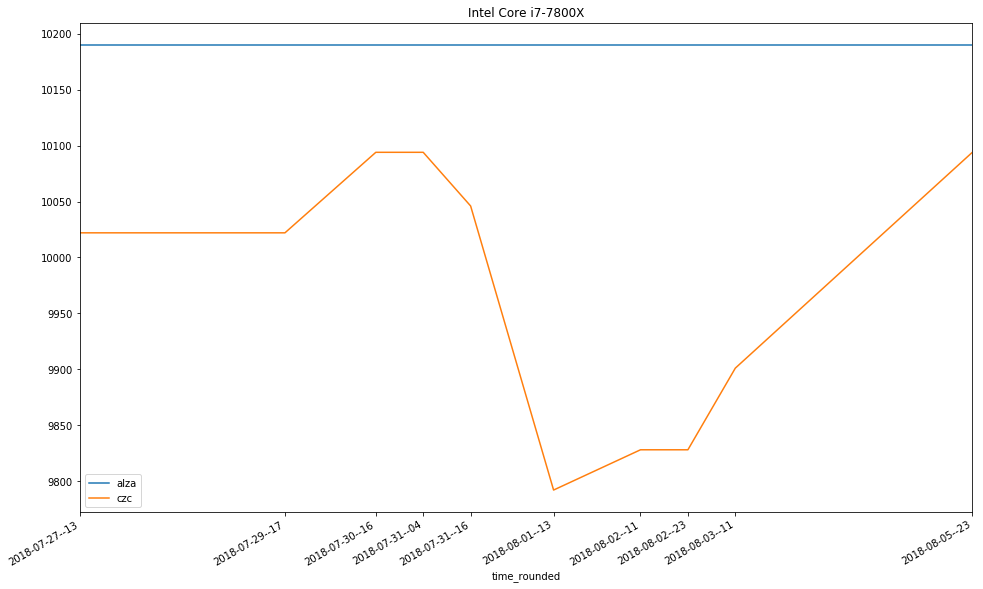

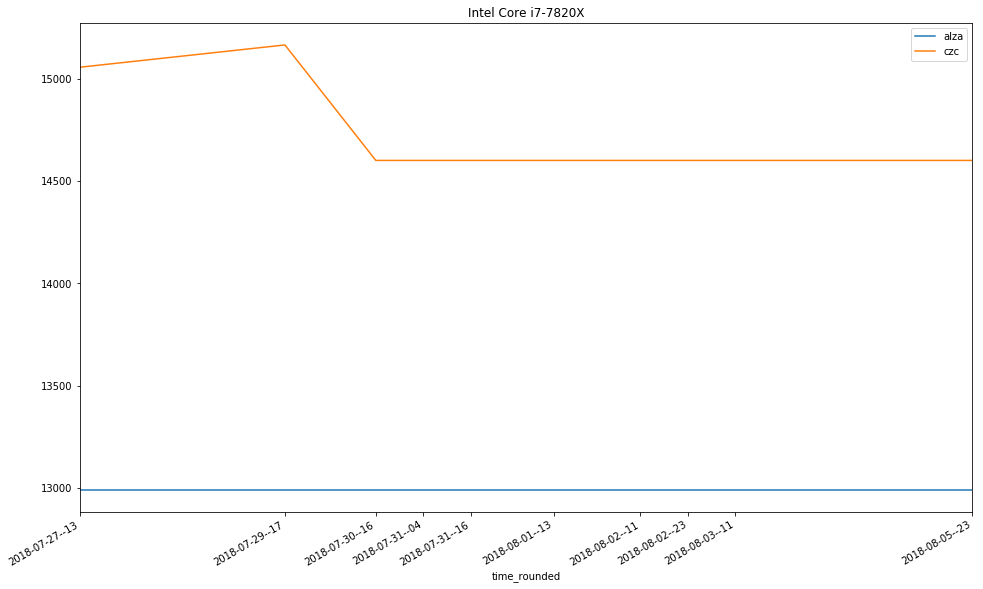

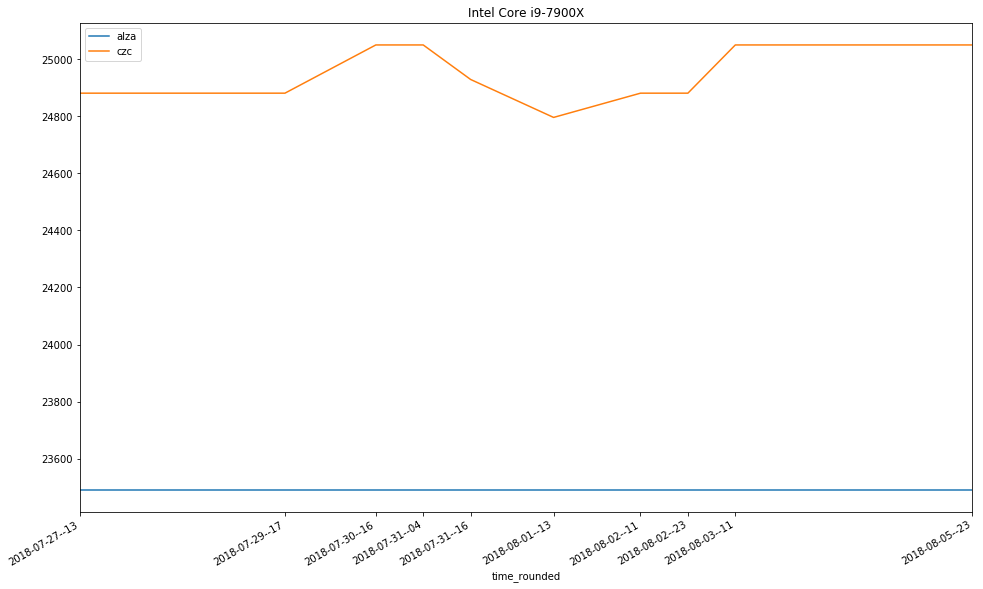

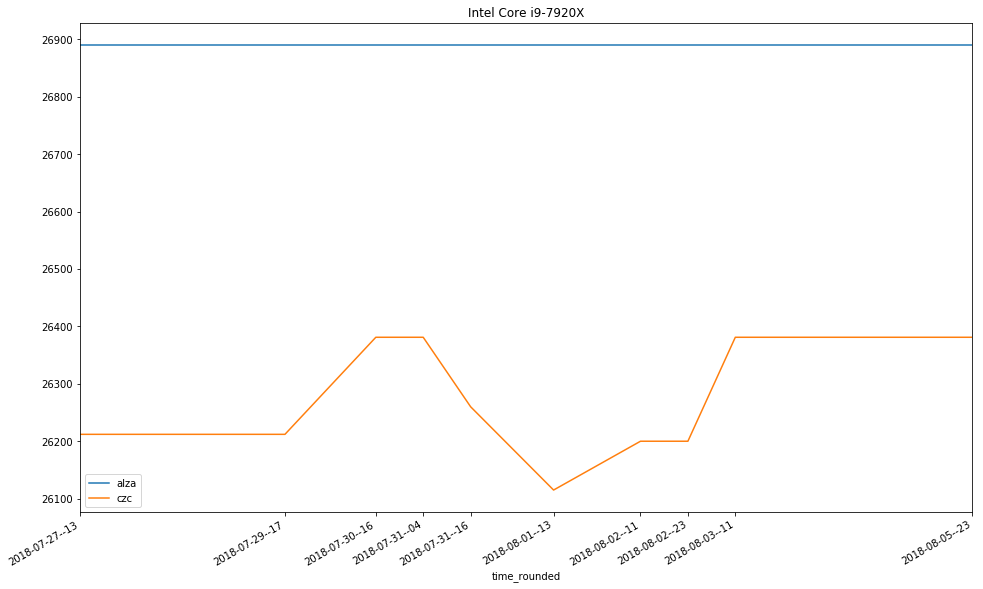

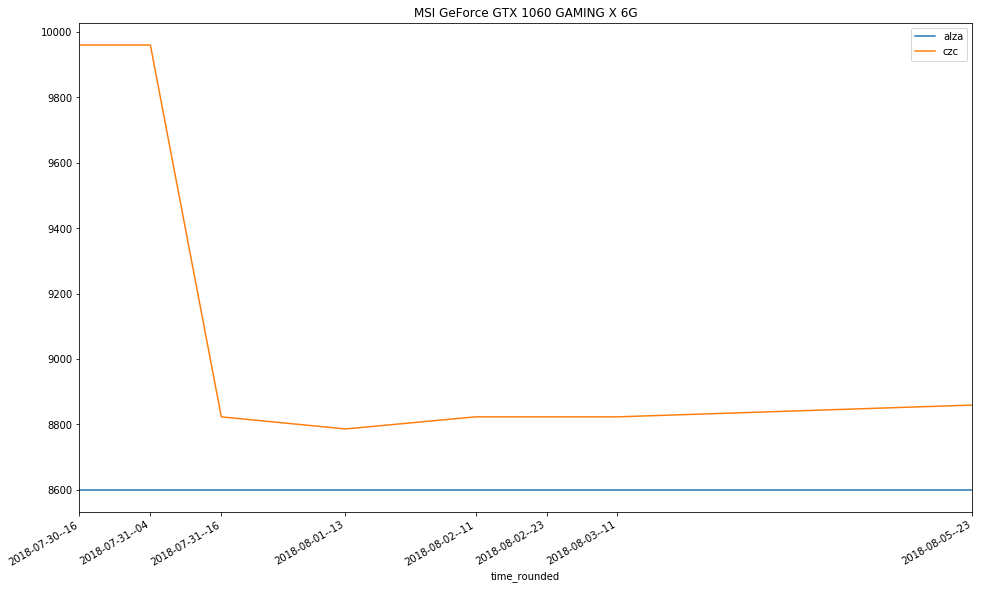

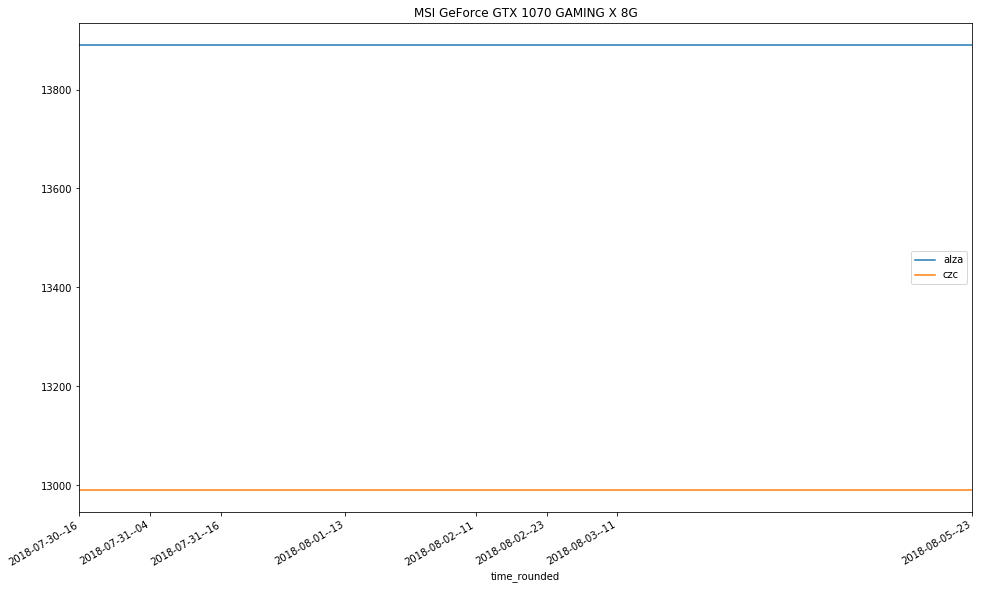

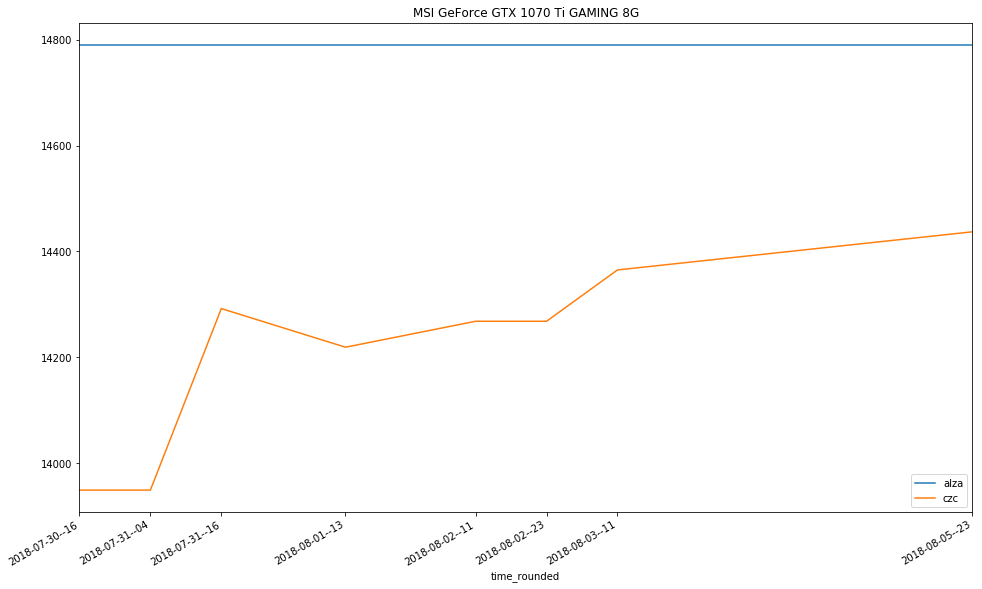

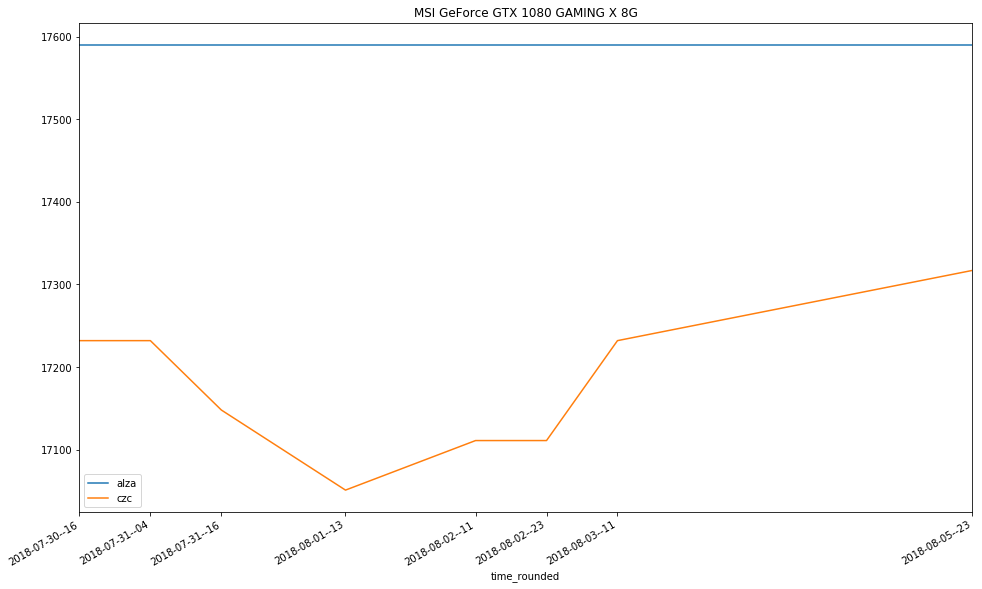

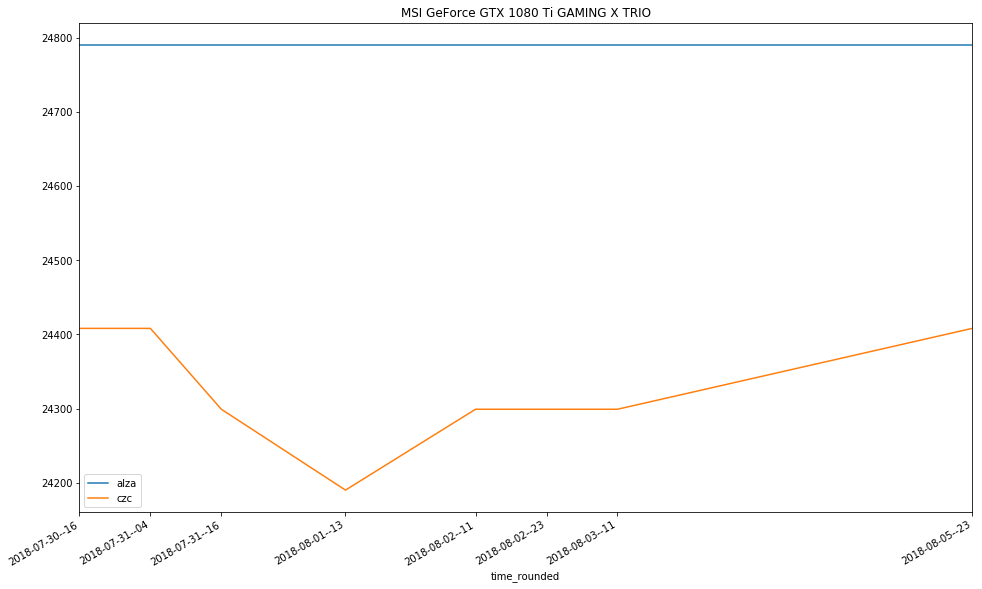

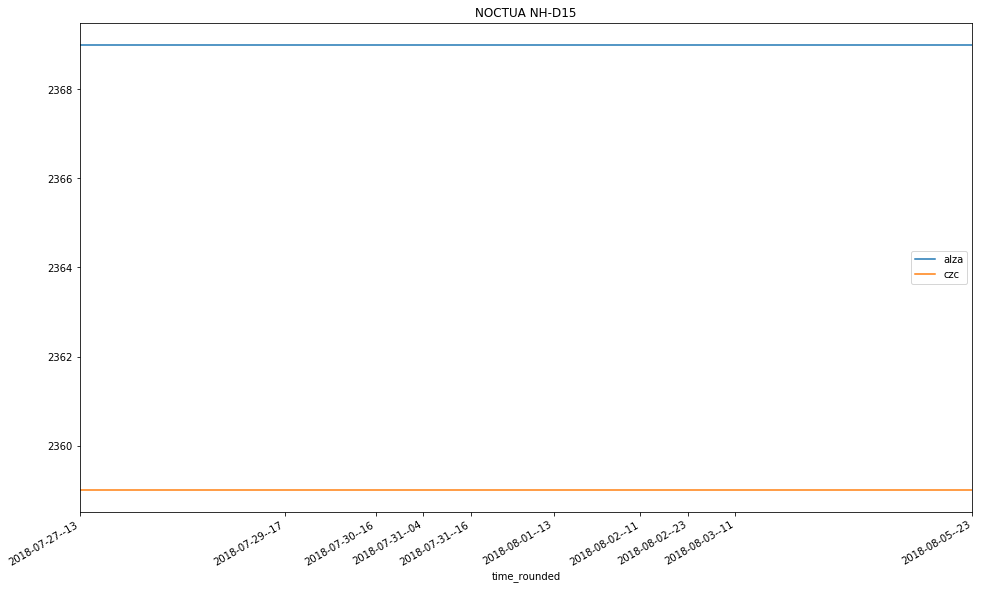

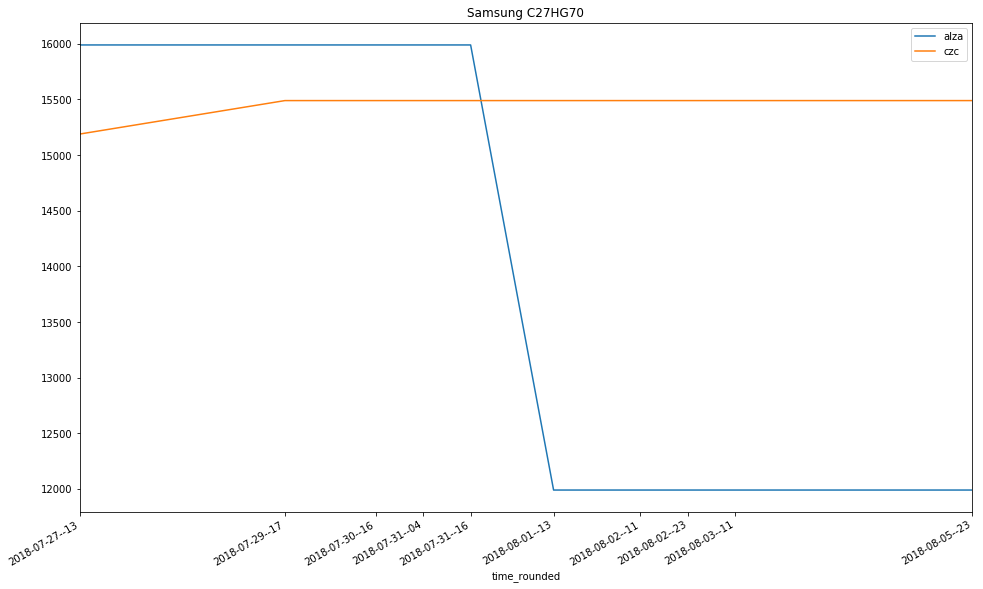

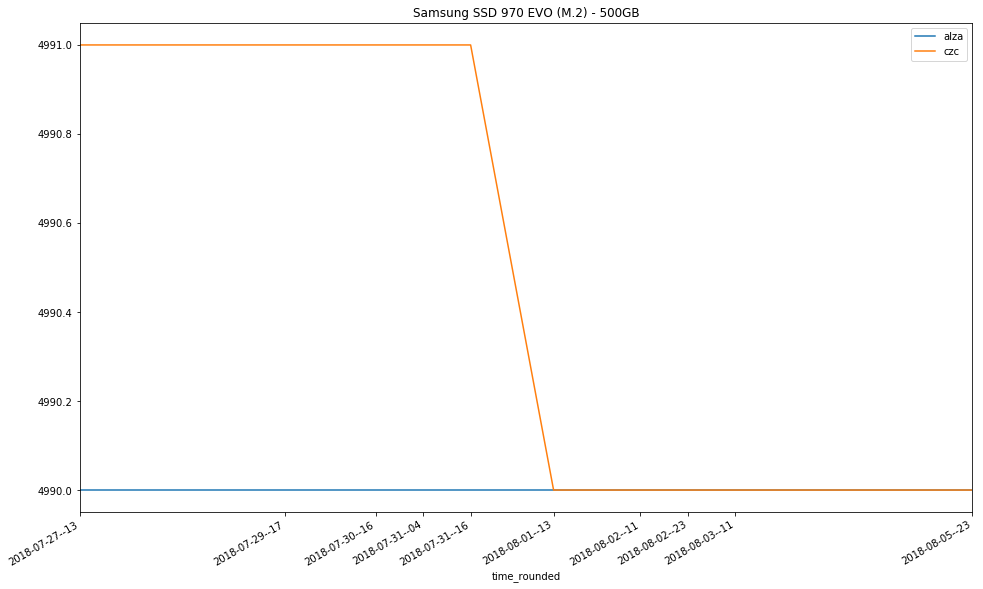

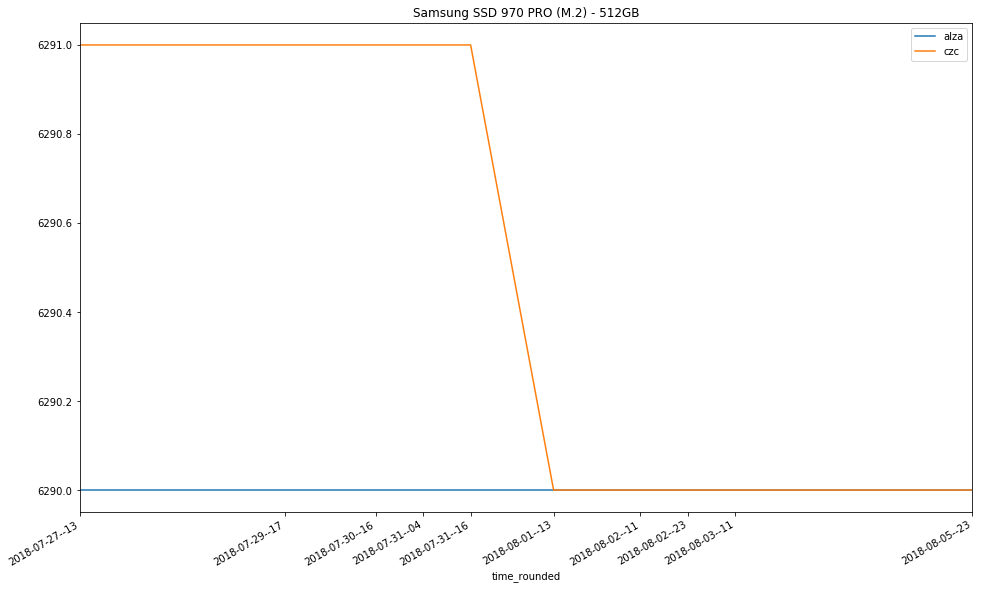

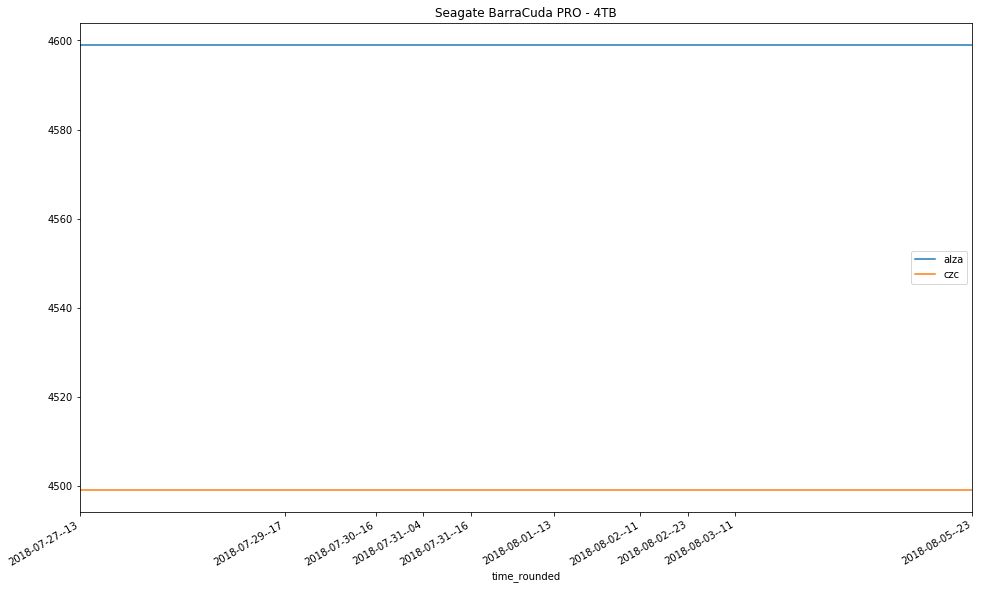

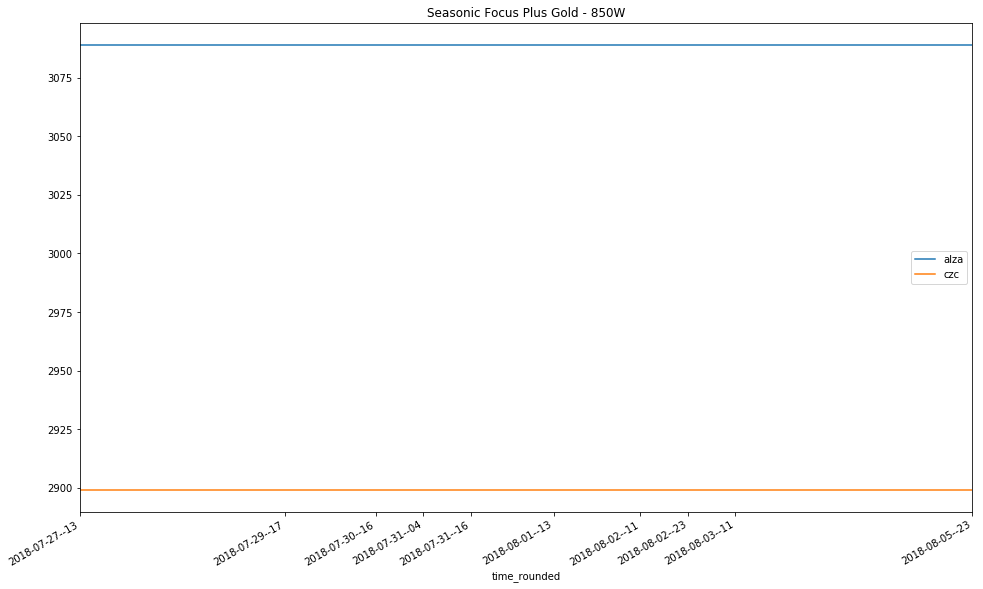

In [6]:
for label, grp in prices.groupby('product'):
    fig, ax = plt.subplots(figsize=(16, 10))
    plt.title(label)
    for shop_name, product in grp.groupby('shop'):
        product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
    plt.xticks(grp['time_rounded'].unique(), grp['time_rounded'].unique())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
    fig.autofmt_xdate()
    plt.show()

In [7]:
# Intel build
intel_components = [
    'Intel Core i7-7800X',
    'ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING',
    'ASUS PRIME X299-A - Intel X299',
    'ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000',
    'Be quiet! Dark Rock PRO 4',
    'Samsung SSD 970 EVO (M.2) - 500GB',
    'Seagate BarraCuda PRO - 4TB',
    'Seasonic Focus Plus Gold - 850W',
    'Fractal Design Meshify C Blackout TG',
    'Arctic Fan F12',
    'Samsung C27HG70',
]

In [8]:
# AMD threadripper build
amd_tr_components = [
    'AMD RYZEN Threadripper 1900X',
    'ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING',
    'ASUS PRIME X399-A - AMD X399',
    'ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000',
    'Be quiet! Dark Rock PRO 4',
    'Samsung SSD 970 EVO (M.2) - 500GB',
    'Seagate BarraCuda PRO - 4TB',
    'Seasonic Focus Plus Gold - 850W',
    'Fractal Design Meshify C Blackout TG',
    'Arctic Fan F12',
    'Samsung C27HG70',
]

In [9]:
# AMD build
amd_components = [
    'AMD Ryzen 7 2700X',
    'ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING',
    'ASUS PRIME X470-PRO',
    'ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000',
    'Samsung SSD 970 EVO (M.2) - 500GB',
    'Seagate BarraCuda PRO - 4TB',
    'Seasonic Focus Plus Gold - 850W',
    'Fractal Design Meshify C Blackout TG',
    'Arctic Fan F12',
    'Samsung C27HG70',
]

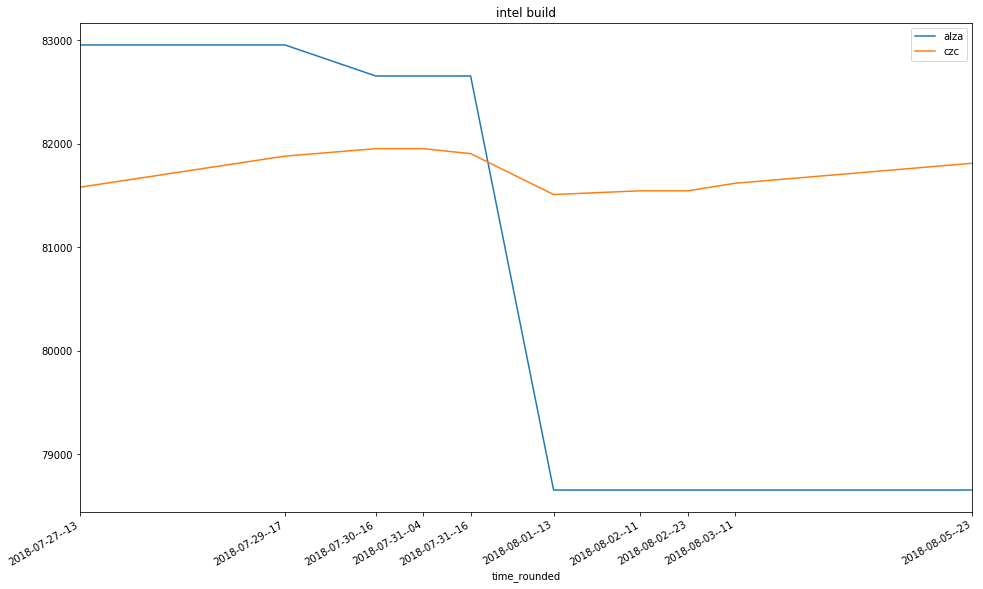

,time_rounded,shop,price
0,2018-07-27 13:00:00,alza,82953.0
1,2018-07-27 13:00:00,czc,81578.0
2,2018-07-29 17:00:00,alza,82953.0
3,2018-07-29 17:00:00,czc,81879.0
4,2018-07-30 16:00:00,alza,82653.0
5,2018-07-30 16:00:00,czc,81951.0
6,2018-07-31 04:00:00,alza,82653.0
7,2018-07-31 04:00:00,czc,81951.0
8,2018-07-31 16:00:00,alza,82653.0
9,2018-07-31 16:00:00,czc,81903.0


In [10]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('intel build')
intel_build_price = prices[prices['product'].isin(intel_components)].groupby(['time_rounded', 'shop'])['price'].sum().to_frame('price').reset_index()
for shop_name, product in intel_build_price.groupby('shop'):
    product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
plt.xticks(intel_build_price['time_rounded'].unique(), intel_build_price['time_rounded'].unique())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
plt.show()
display(intel_build_price)

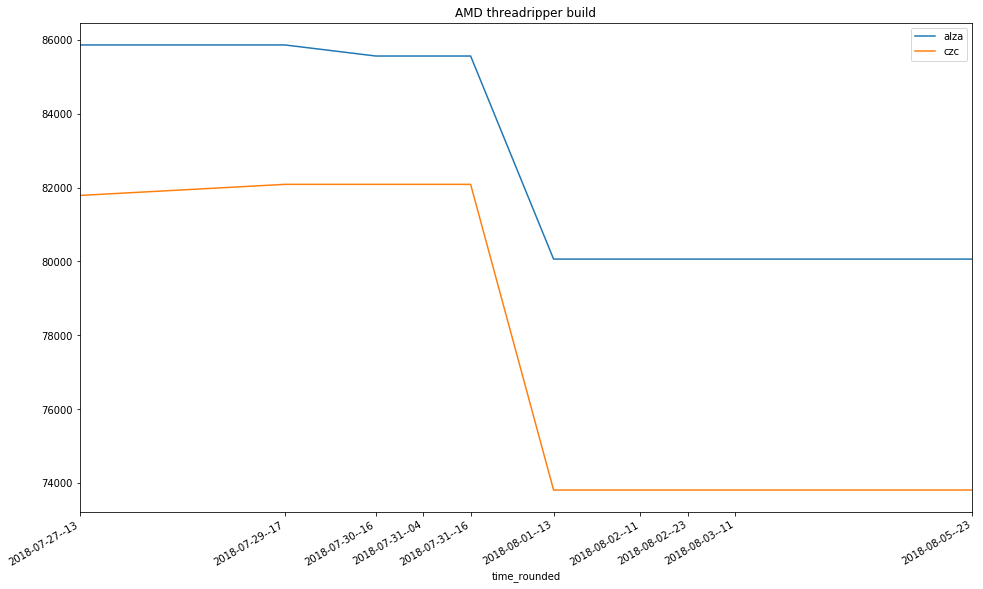

,time_rounded,shop,price
0,2018-07-27 13:00:00,alza,85863.0
1,2018-07-27 13:00:00,czc,81786.0
2,2018-07-29 17:00:00,alza,85863.0
3,2018-07-29 17:00:00,czc,82087.0
4,2018-07-30 16:00:00,alza,85563.0
5,2018-07-30 16:00:00,czc,82087.0
6,2018-07-31 04:00:00,alza,85563.0
7,2018-07-31 04:00:00,czc,82087.0
8,2018-07-31 16:00:00,alza,85563.0
9,2018-07-31 16:00:00,czc,82087.0


In [12]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('AMD threadripper build')
amd_tr_build_price = prices[prices['product'].isin(amd_tr_components)].groupby(['time_rounded', 'shop'])['price'].sum().to_frame('price').reset_index()
for shop_name, product in amd_tr_build_price.groupby('shop'):
    product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
plt.xticks(amd_tr_build_price['time_rounded'].unique(), amd_tr_build_price['time_rounded'].unique())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
plt.show()
display(amd_tr_build_price)

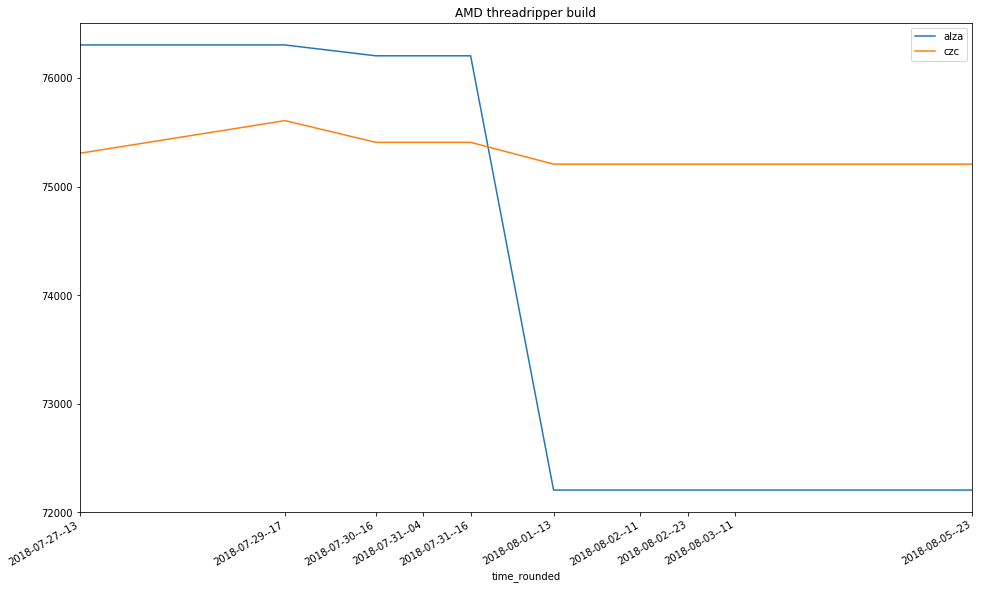

,time_rounded,shop,price
0,2018-07-27 13:00:00,alza,76304.0
1,2018-07-27 13:00:00,czc,75306.0
2,2018-07-29 17:00:00,alza,76304.0
3,2018-07-29 17:00:00,czc,75607.0
4,2018-07-30 16:00:00,alza,76204.0
5,2018-07-30 16:00:00,czc,75407.0
6,2018-07-31 04:00:00,alza,76204.0
7,2018-07-31 04:00:00,czc,75407.0
8,2018-07-31 16:00:00,alza,76204.0
9,2018-07-31 16:00:00,czc,75407.0


In [13]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('AMD threadripper build')
amd_build_price = prices[prices['product'].isin(amd_components)].groupby(['time_rounded', 'shop'])['price'].sum().to_frame('price').reset_index()
for shop_name, product in amd_build_price.groupby('shop'):
    product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
plt.xticks(amd_build_price['time_rounded'].unique(), amd_build_price['time_rounded'].unique())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
plt.show()
display(amd_build_price)

In [ ]:
prices.groupby('product').get_group('ASUS GeForce GTX 1060 ROG STRIX-GTX1060-6G-GAMING')['time_rounded'].unique()

In [ ]:
prices.groupby('product').get_group('ASUS GeForce GTX 1060 ROG STRIX-GTX1060-6G-GAMING')